In [1]:
!pip install pandas
!pip install scikit-learn
!pip install -U imbalanced-learn
!pip install kaggle
!pip install plotly
!pip install lazypredict


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate

In [3]:
data = pd.read_csv("D:\learning\GUVI PROJECTS\project - 3\cover_type.csv")

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [6]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [7]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area_1                     int64
Wilderness_Area_2                     int64
Wilderness_Area_3                     int64
Wilderness_Area_4                     int64
Soil_Type_1                           int64
Soil_Type_2                           int64
Soil_Type_3                           int64
Soil_Type_4                           int64
Soil_Type_5                           int64
Soil_Type_6                           int64
Soil_Type_7                           int64
Soil_Type_8                           int64
Soil_Type_9                     

In [8]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,...,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00
mean,2959.37,155.66,14.10,269.43,46.42,2350.15,212.15,223.32,142.53,1980.29,...,0.09,0.08,0.00,0.00,0.00,0.00,0.03,0.02,0.02,2.05
std,279.98,111.91,7.49,212.55,58.30,1559.25,26.77,19.77,38.27,1324.20,...,0.29,0.27,0.05,0.06,0.01,0.02,0.16,0.15,0.12,1.40
min,1859.00,0.00,0.00,0.00,-173.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,2809.00,58.00,9.00,108.00,7.00,1106.00,198.00,213.00,119.00,1024.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,2996.00,127.00,13.00,218.00,30.00,1997.00,218.00,226.00,143.00,1710.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
75%,3163.00,260.00,18.00,384.00,69.00,3328.00,231.00,237.00,168.00,2550.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
max,3858.00,360.00,66.00,1397.00,601.00,7117.00,254.00,254.00,254.00,7173.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,7.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_1                   581012 non-null  int64
 11  Wilderness_Area_2                   581012 non-null 

In [10]:
df['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4])

In [11]:
df['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

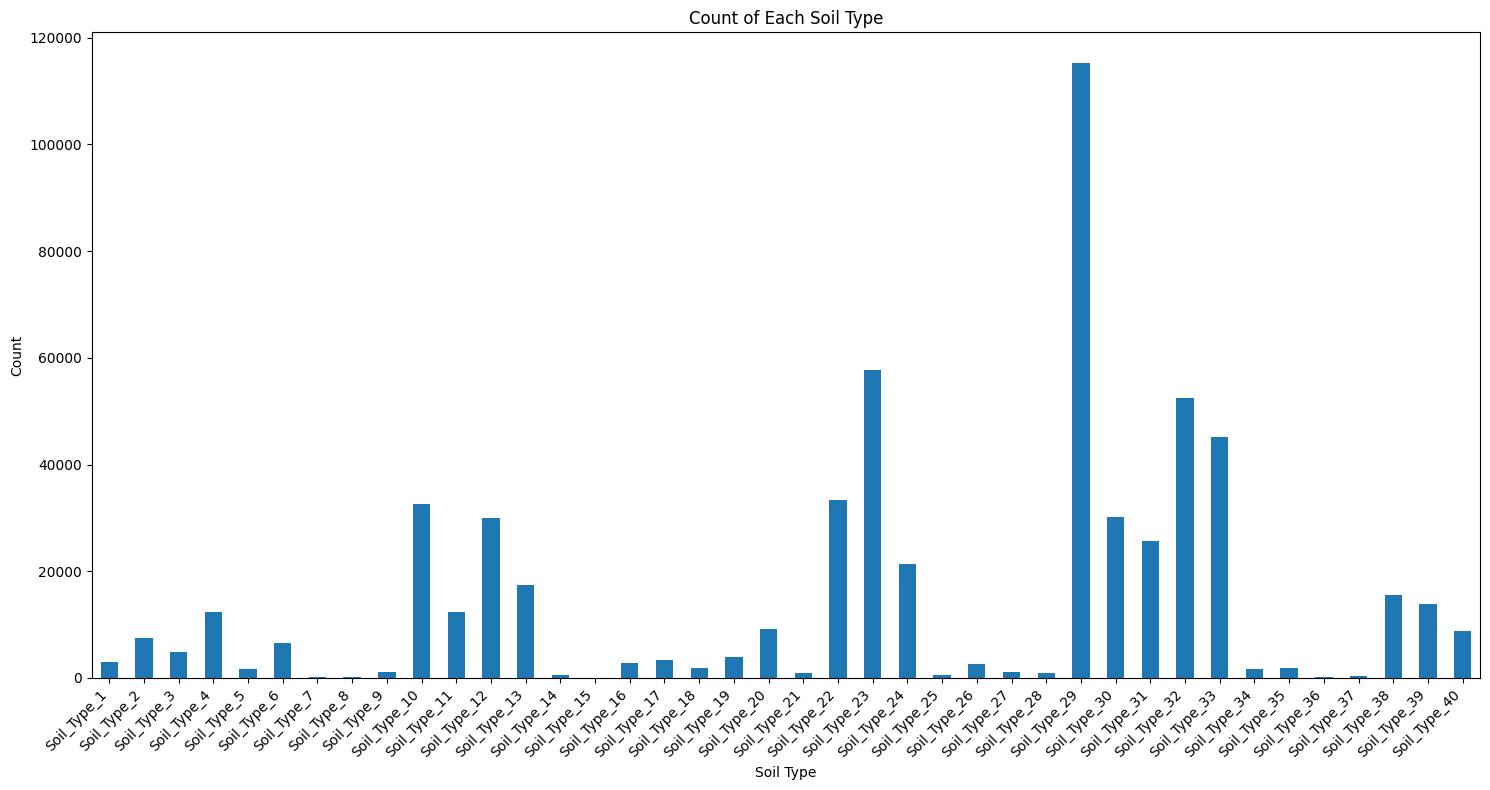

In [12]:
# Step 1: Select the columns that represent the soil types
# The columns are named Soil_Type_1 to Soil_Type_40
soil_columns = [f'Soil_Type_{i}' for i in range(1, 41)]

# Step 2: Count the occurrences of each soil type
# Since the columns are binary (0 or 1), summing them gives the total count.
soil_counts = df[soil_columns].sum()

# Step 4: Create the bar chart
plt.figure(figsize=(15, 8)) # Adjust figure size for better readability
soil_counts.plot(kind='bar')
plt.title('Count of Each Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better fit
plt.tight_layout() # Adjust layout to prevent labels from being cut off

# Step 5: Display the plot
plt.show()

# If you prefer to save the plot as a file instead of displaying it
# plt.savefig('soil_type_counts.png')

In [13]:
#Removing columns
df.drop(columns = ['Soil_Type_7', 'Soil_Type_8', 'Soil_Type_14','Soil_Type_15','Soil_Type_25','Soil_Type_36','Soil_Type_37'], inplace = True)

In [14]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_9', 'Soil_Type_10',
       'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29',
       'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33',
       'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_38', 'Soil_Type_39',
       'Soil_Type_40', 'Cover_Type'],
      dtype='object')

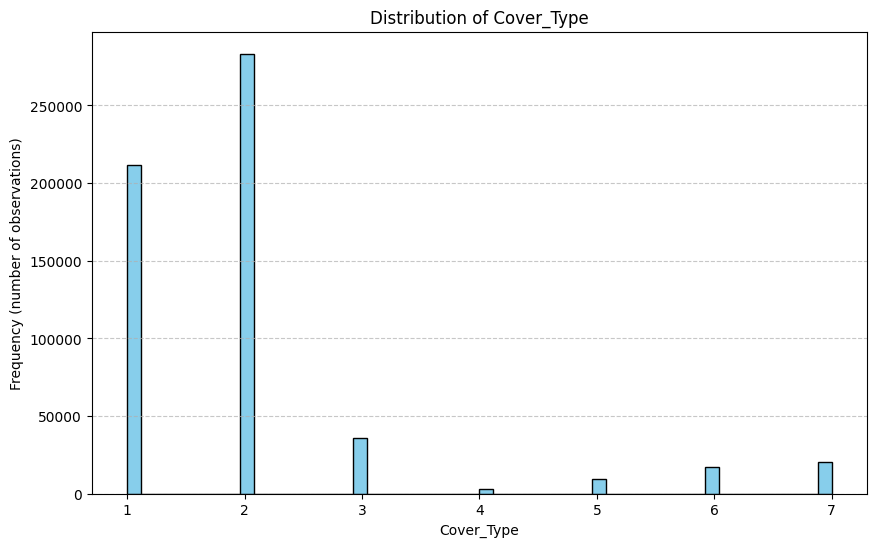

In [15]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Create a histogram of the 'Cover_Type' column
plt.figure(figsize=(10, 6))
plt.hist(df['Cover_Type'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Cover_Type')
plt.xlabel('Cover_Type')
plt.ylabel('Frequency (number of observations)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

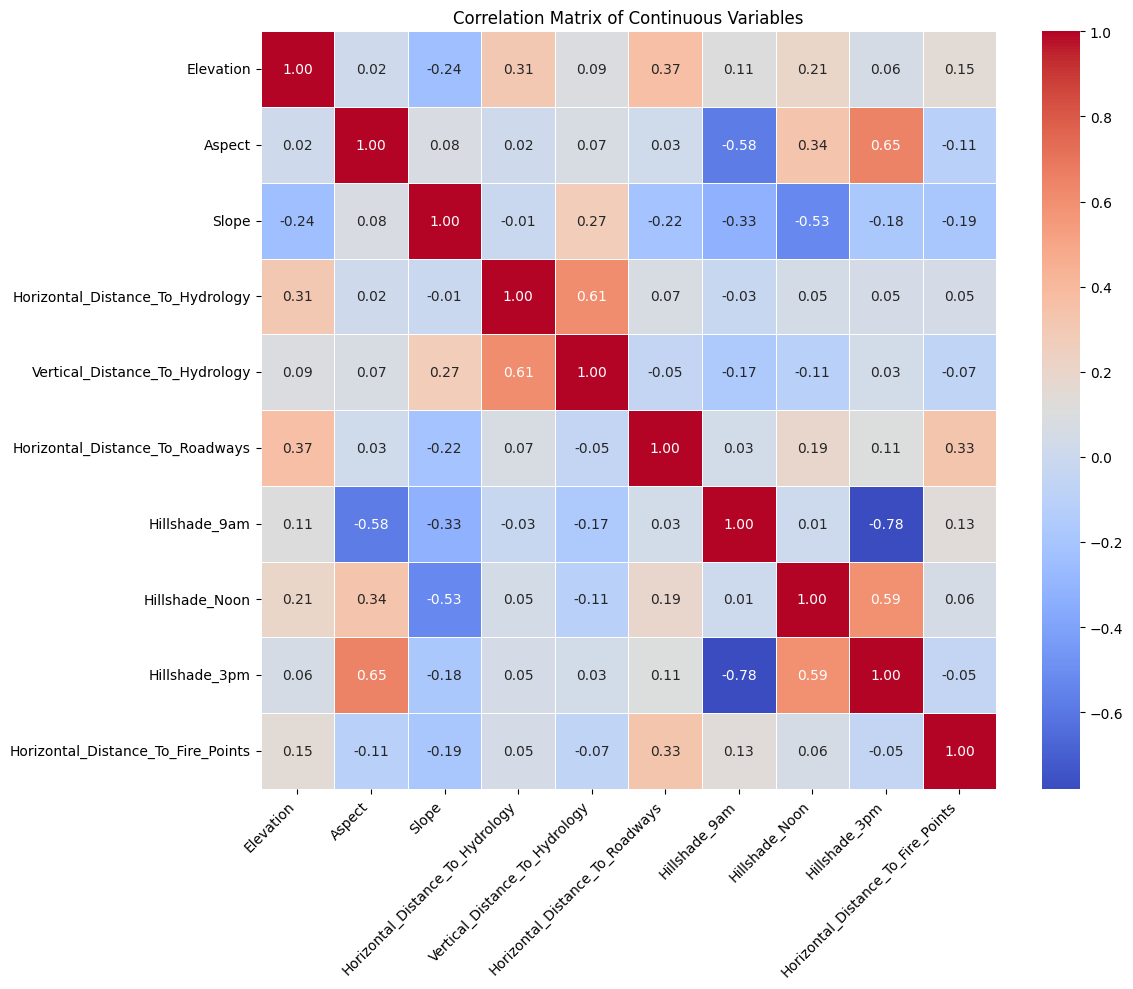

In [16]:
continuous_cols = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Create the correlation matrix
correlation_matrix = df[continuous_cols].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10}, linewidths=.5)
plt.title('Correlation Matrix of Continuous Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

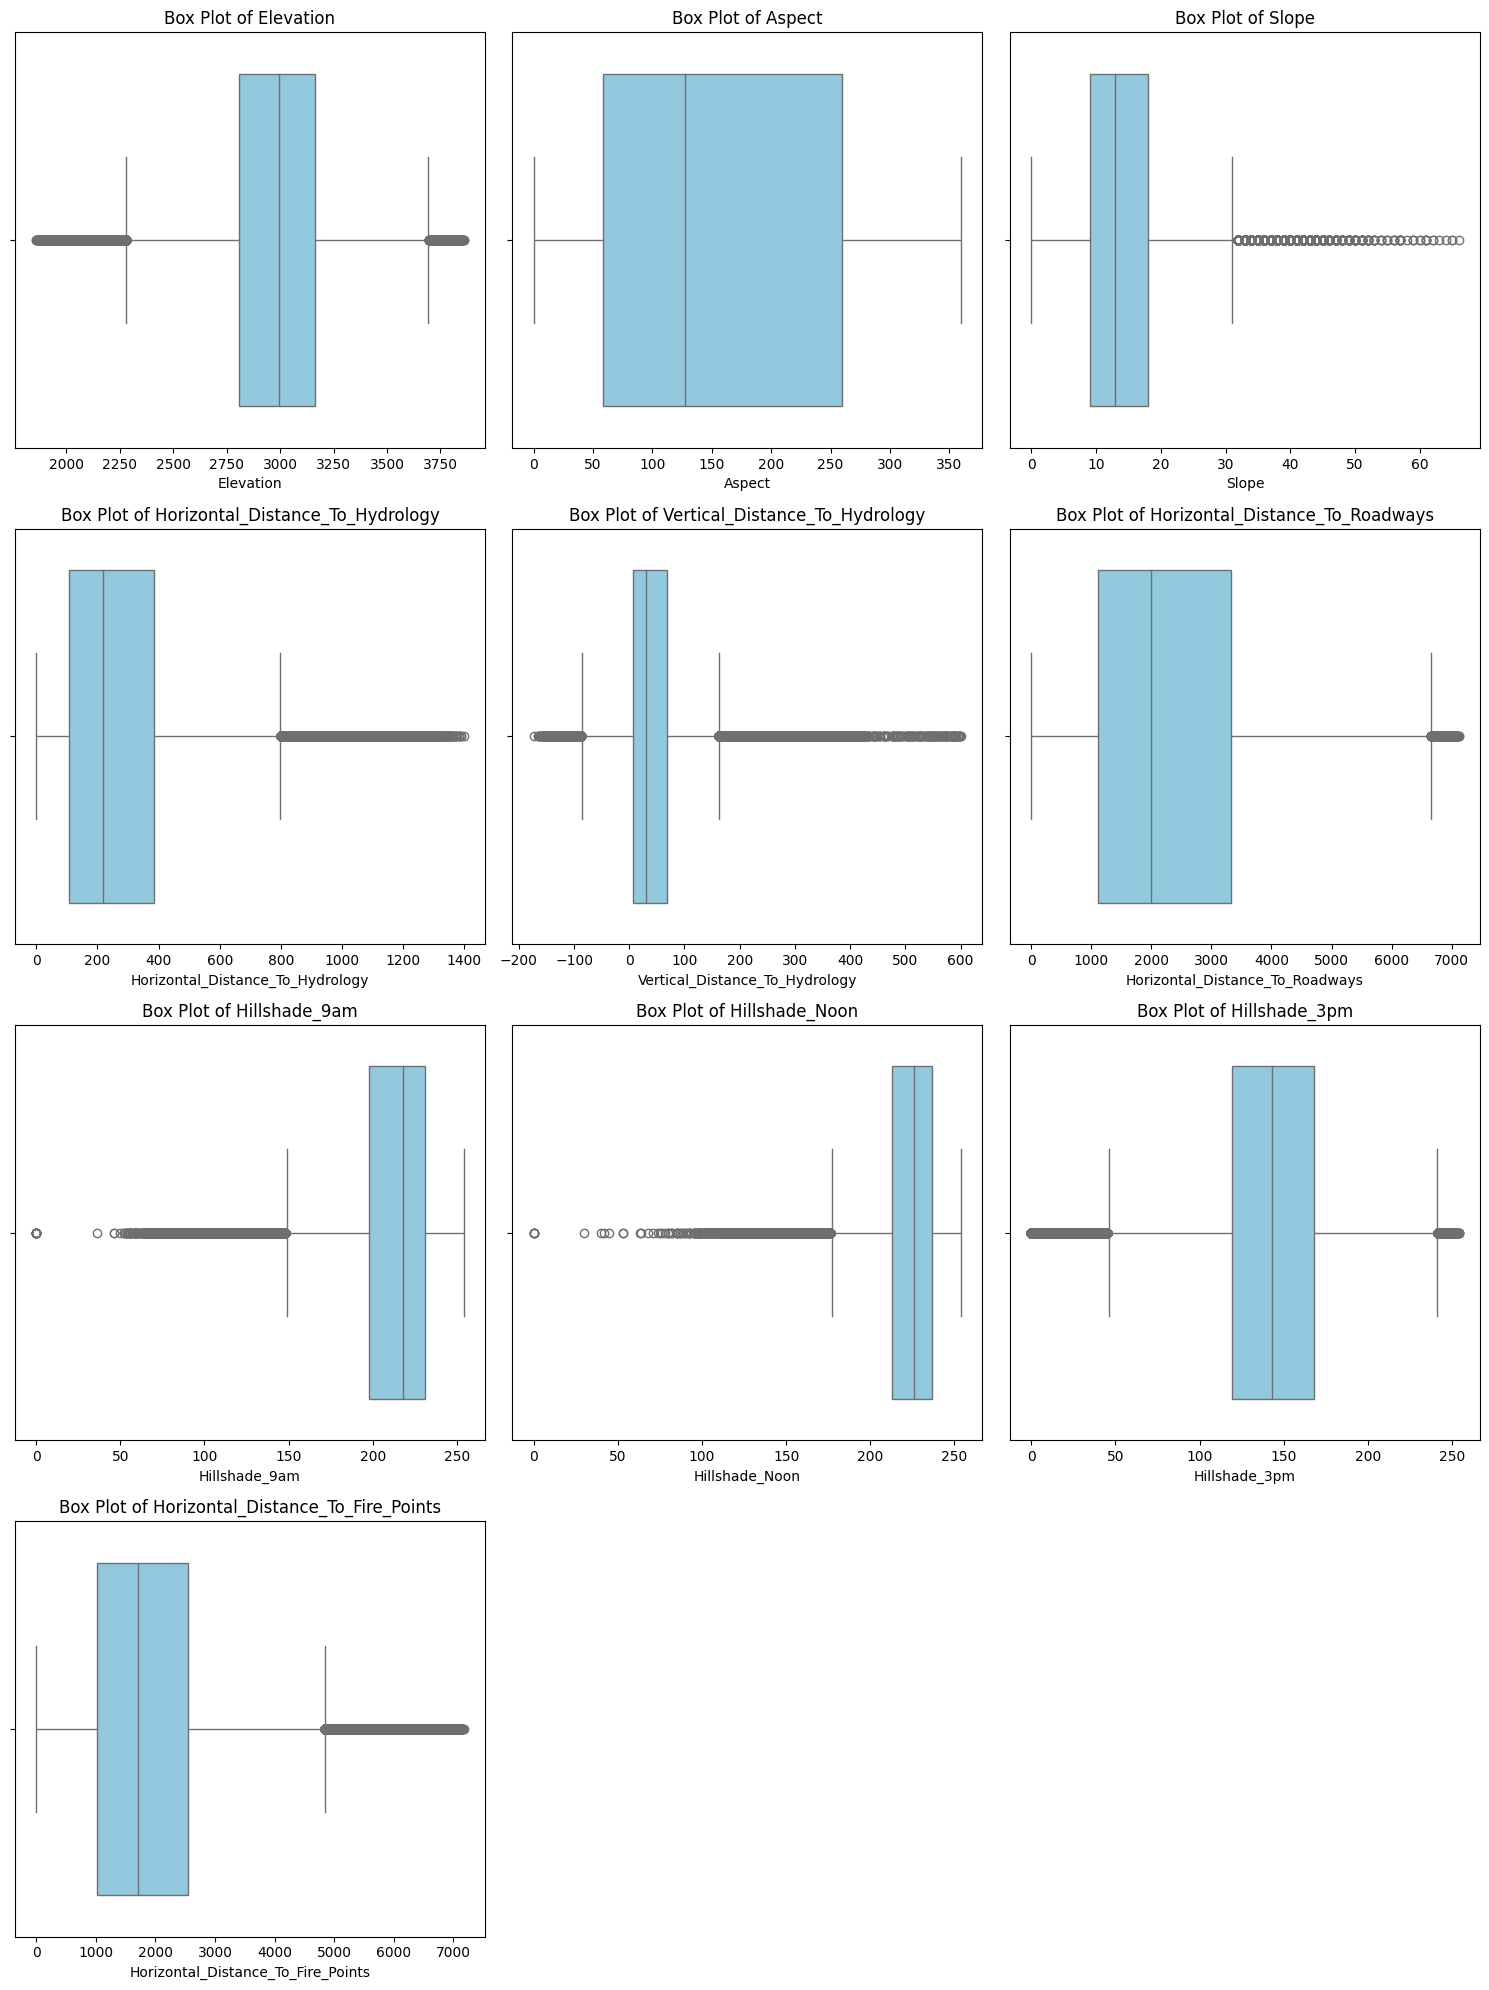

In [17]:
# List of continuous columns to plot
continuous_cols = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Set up the subplot grid
num_plots = len(continuous_cols)
num_cols = 3
num_rows = int(np.ceil(num_plots / num_cols))
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each column and create a box plot
for i, col in enumerate(continuous_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

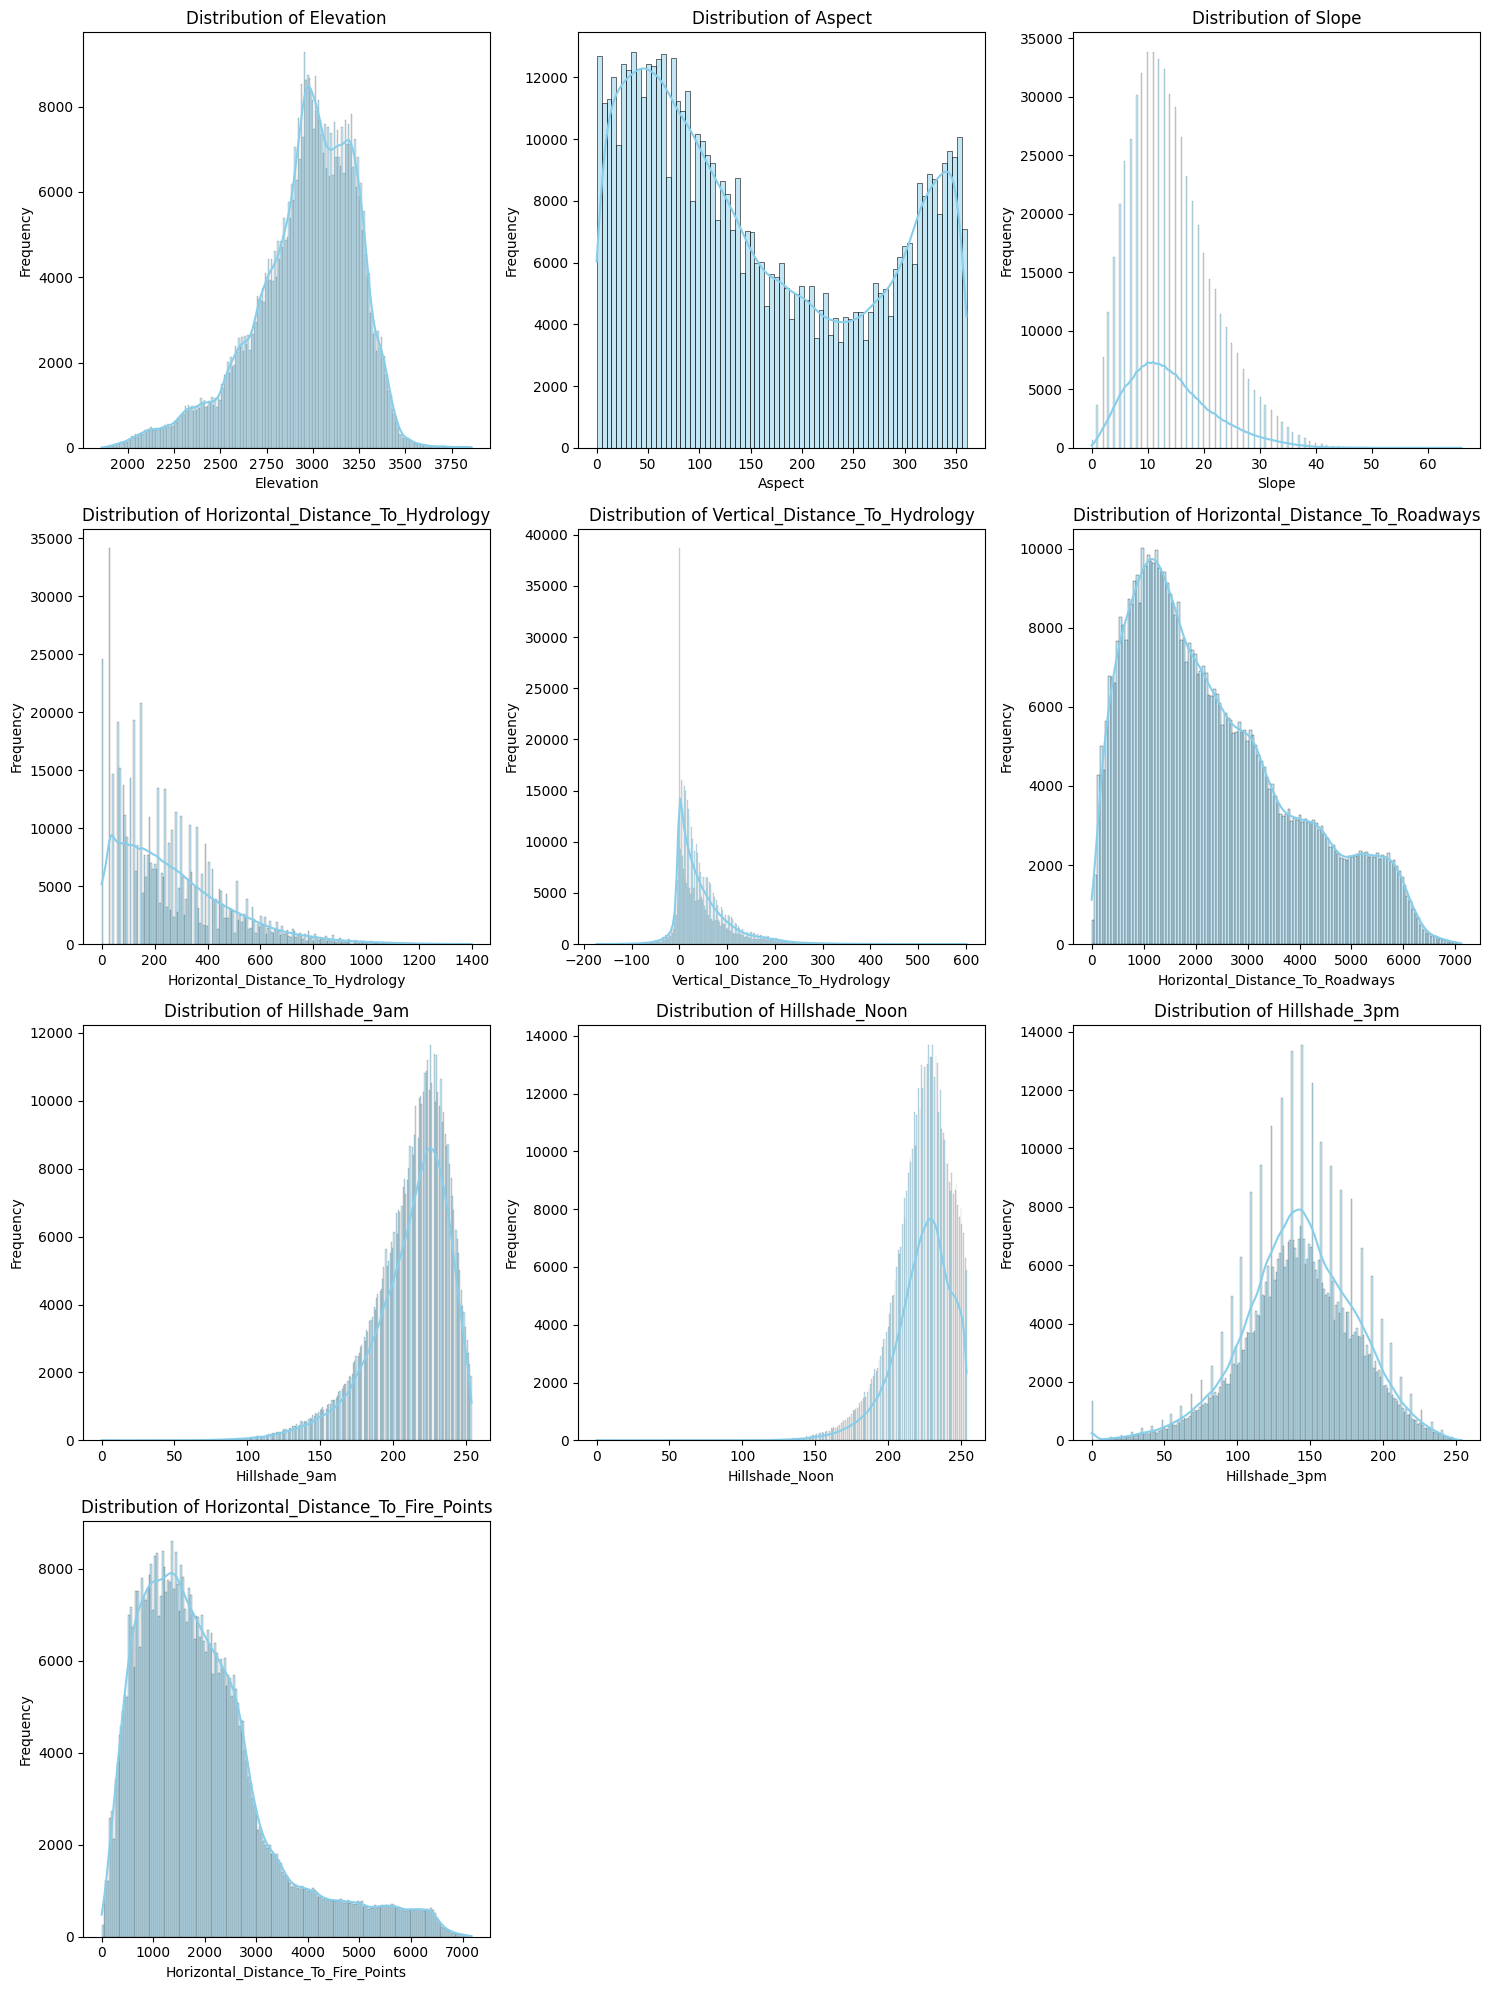

In [18]:
# List of continuous columns to plot
continuous_cols = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Set up the subplot grid
num_plots = len(continuous_cols)
num_cols = 3
num_rows = int(np.ceil(num_plots / num_cols))
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each column and create a distribution plot
for i, col in enumerate(continuous_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

In [19]:
import numpy as np
import pandas as pd

# List of continuous columns to process
continuous_cols = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Create a copy of the DataFrame to work with
df1 = df.copy()
print("Original data shape:", df1.shape)

# Step 1: Handle missing values by imputing with median
for col in continuous_cols:
    median_value = df1[col].median()
    df1[col].fillna(median_value, inplace=True)
    print(f"{col}: missing values imputed with median = {median_value}")

# Step 2: Detect and remove outliers using IQR method
for col in continuous_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    before_count = df1.shape[0]
    df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]
    after_count = df1.shape[0]
    print(f"{col}: removed {before_count - after_count} outliers")

df1.reset_index(drop=True, inplace=True)
print("Data shape after outlier removal:", df1.shape)

# Step 3: Fix skewness in continuous cols using log1p transformation
for col in continuous_cols:
    df1[col] = np.log1p(df1[col])  # log(1 + x) transformation to reduce skewness
    print(f"{col}: applied log1p transformation to fix skewness")

print("Data preprocessing completed.")


Original data shape: (581012, 48)
Elevation: missing values imputed with median = 2996.0
Aspect: missing values imputed with median = 127.0
Slope: missing values imputed with median = 13.0
Horizontal_Distance_To_Hydrology: missing values imputed with median = 218.0
Vertical_Distance_To_Hydrology: missing values imputed with median = 30.0
Horizontal_Distance_To_Roadways: missing values imputed with median = 1997.0
Hillshade_9am: missing values imputed with median = 218.0
Hillshade_Noon: missing values imputed with median = 226.0
Hillshade_3pm: missing values imputed with median = 143.0
Horizontal_Distance_To_Fire_Points: missing values imputed with median = 1710.0
Elevation: removed 15569 outliers
Aspect: removed 0 outliers
Slope: removed 11407 outliers
Horizontal_Distance_To_Hydrology: removed 12564 outliers
Vertical_Distance_To_Hydrology: removed 28210 outliers
Horizontal_Distance_To_Roadways: removed 263 outliers
Hillshade_9am: removed 12008 outliers
Hillshade_Noon: removed 9390 outl

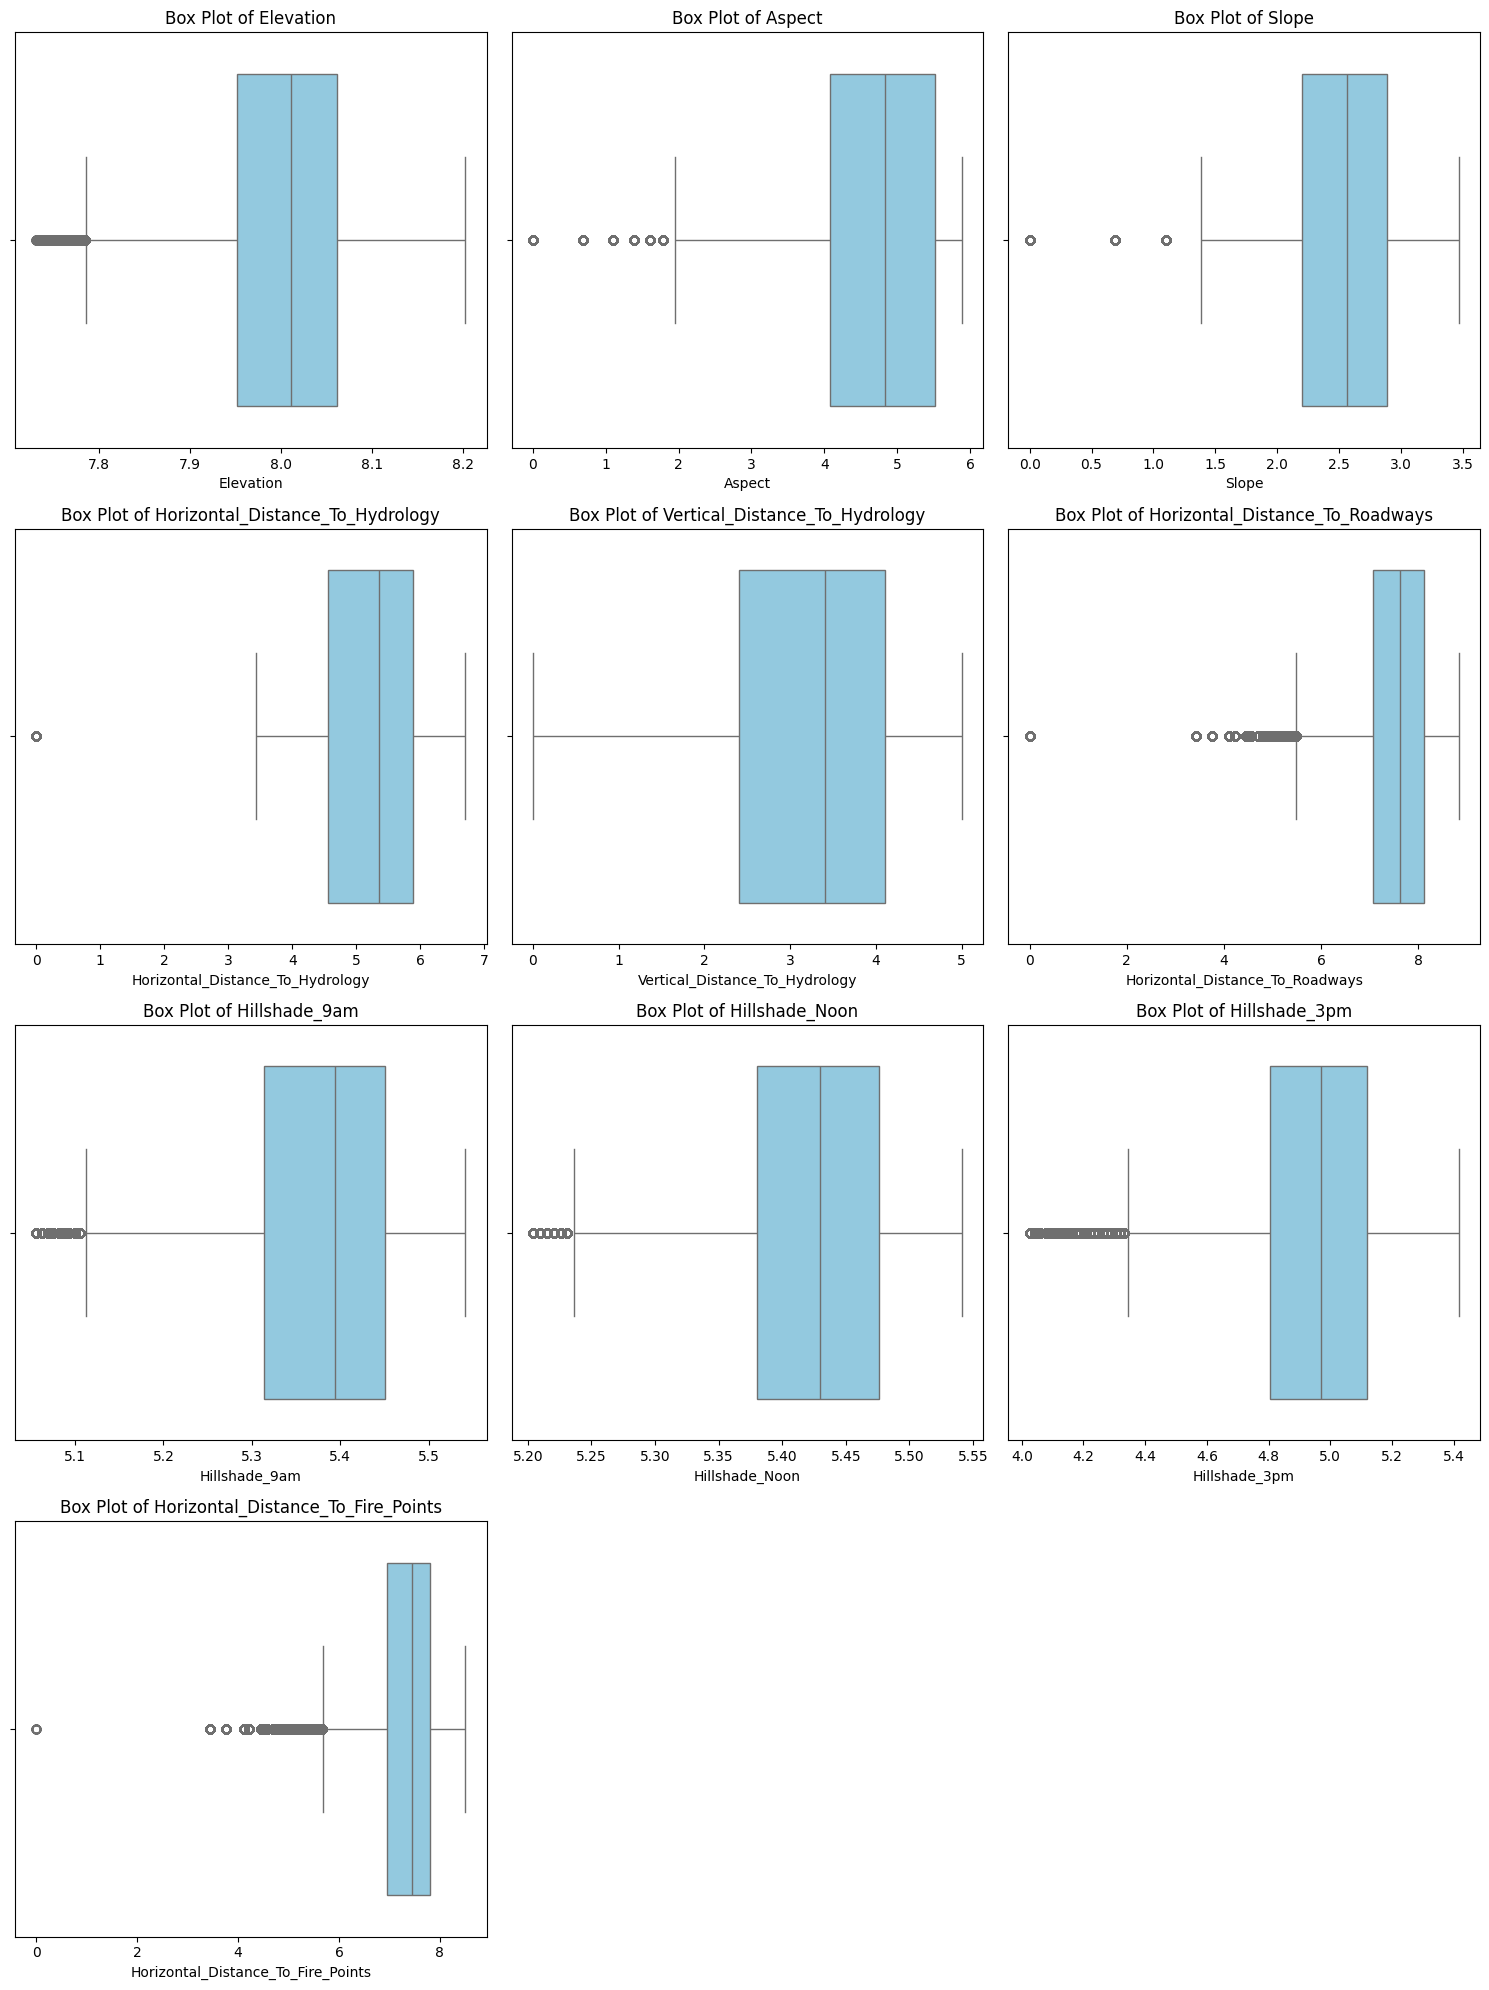

In [20]:
# List of continuous columns to plot
continuous_cols = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Set up the subplot grid
num_plots = len(continuous_cols)
num_cols = 3
num_rows = int(np.ceil(num_plots / num_cols))
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each column and create a box plot
for i, col in enumerate(continuous_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df1[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

Percentage for default

Cover_Type
2   48.76
1   36.46
3    6.15
7    3.53
6    2.99
5    1.63
4    0.47
Name: proportion, dtype: float64


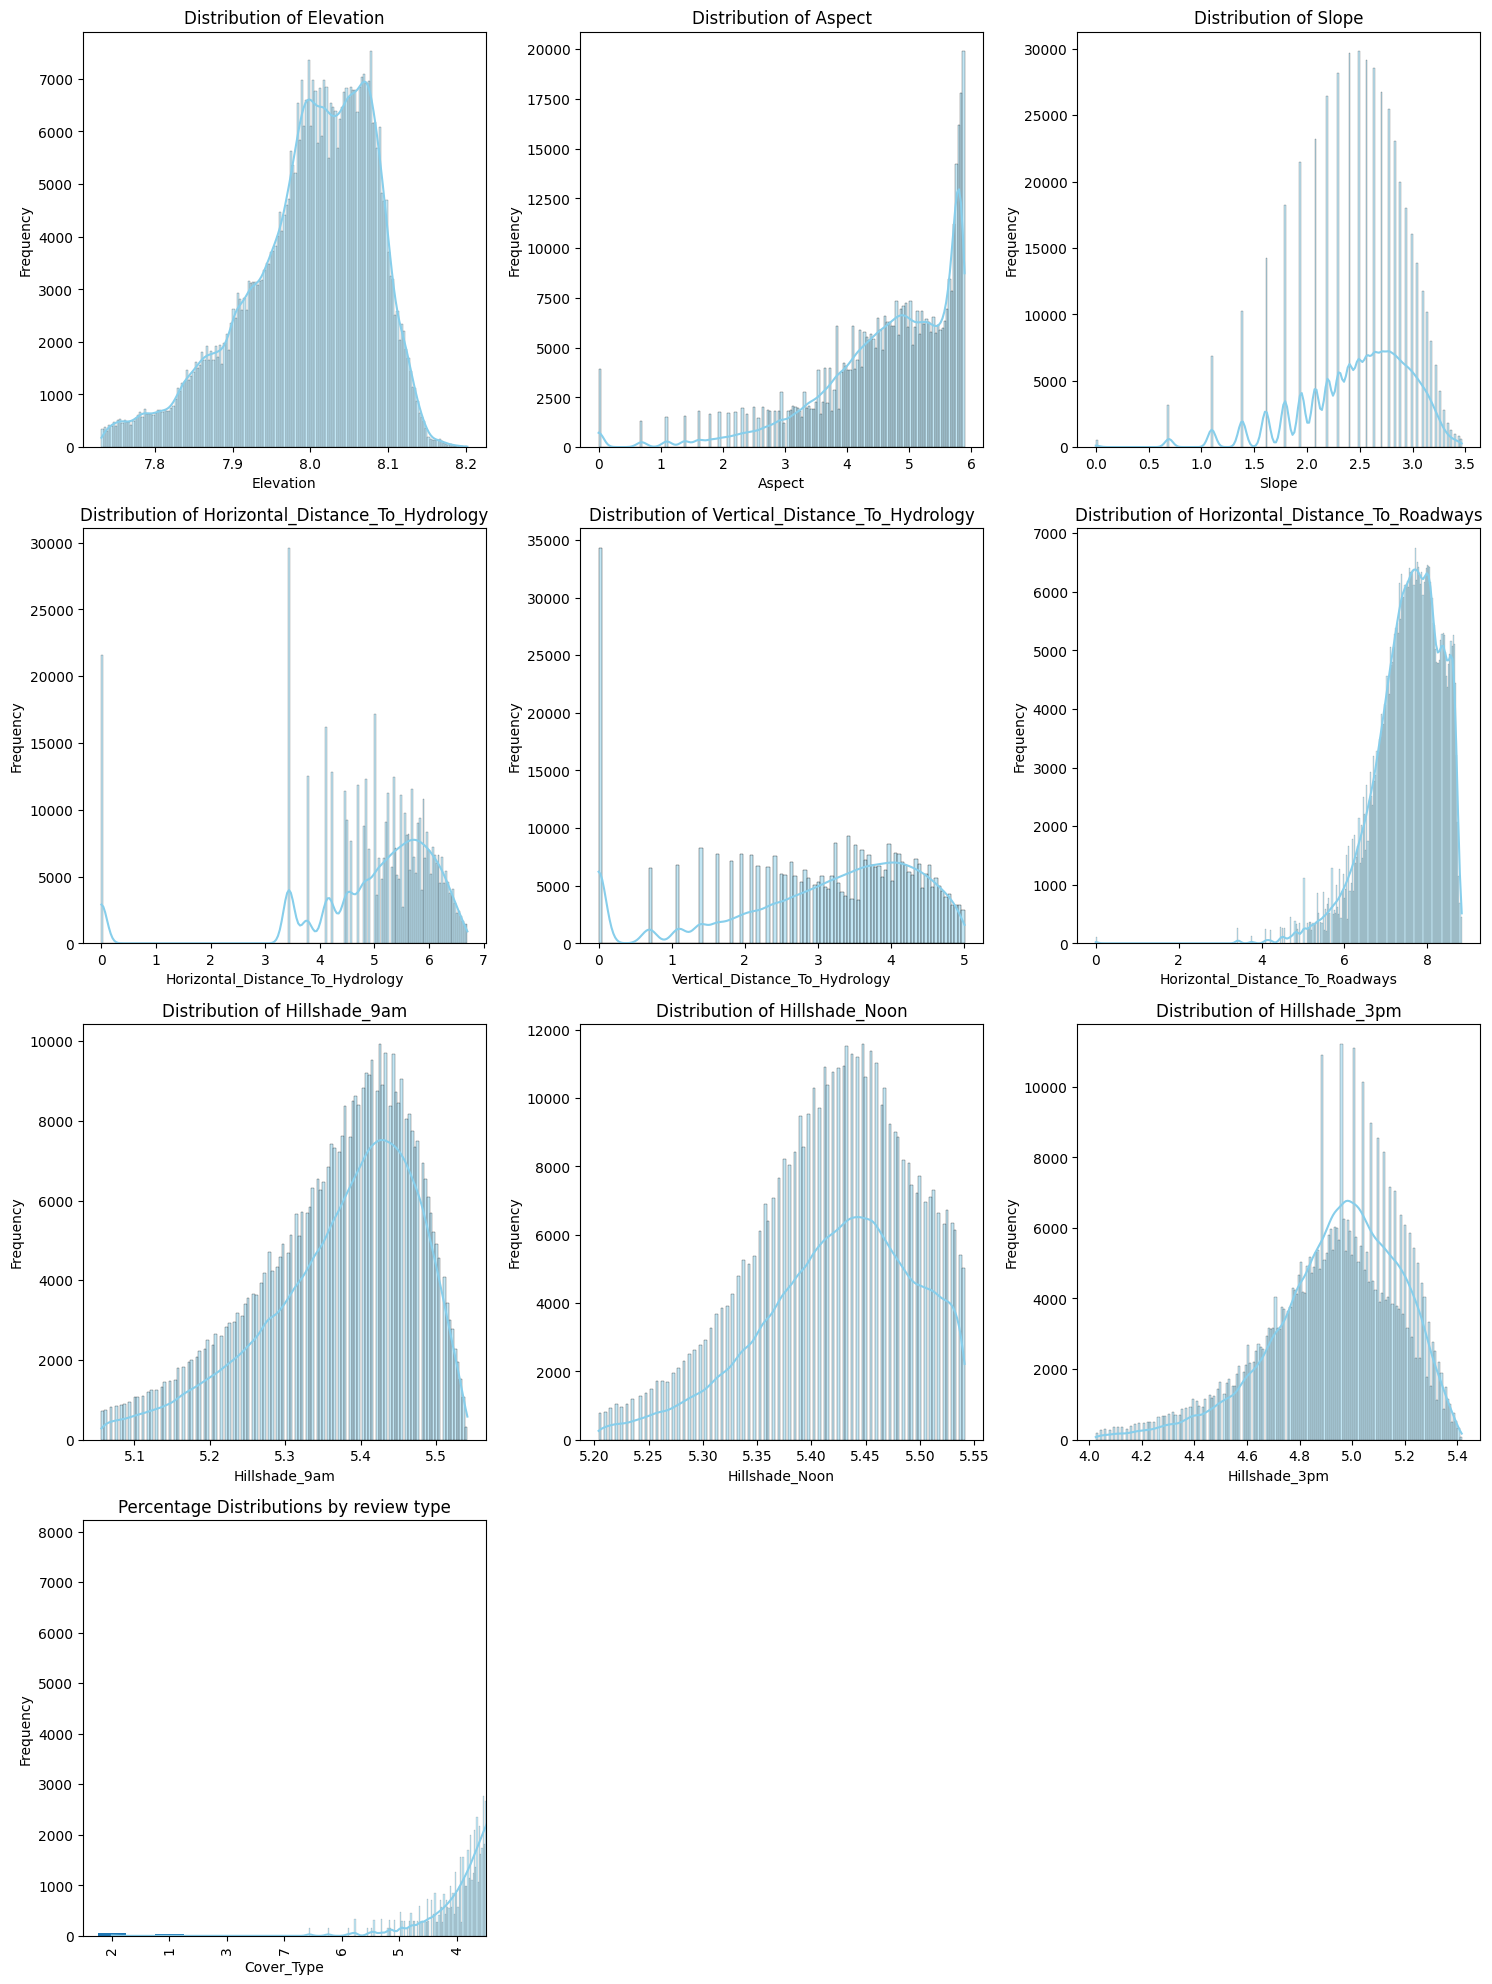

In [21]:
# List of continuous columns to plot
continuous_cols = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Set up the subplot grid
num_plots = len(continuous_cols)
num_cols = 3
num_rows = int(np.ceil(num_plots / num_cols))
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each column and create a distribution plot
for i, col in enumerate(continuous_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df1[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline


print('Percentage for default\n')
print(round(df.Cover_Type.value_counts(normalize=True)*100,2))
round(df.Cover_Type.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

plt.show()

Percentage for default

Cover_Type
2   48.76
1   36.46
3    6.15
7    3.53
6    2.99
5    1.63
4    0.47
Name: proportion, dtype: float64


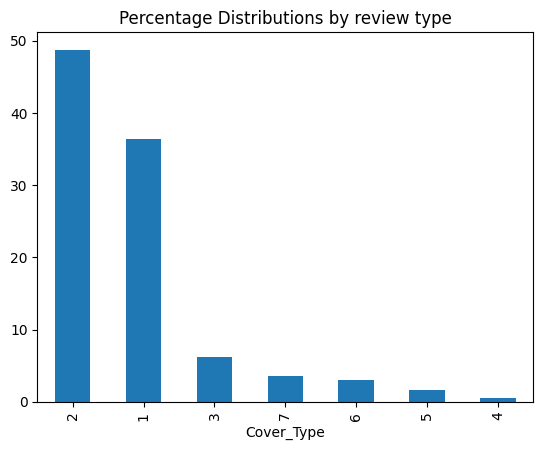

In [22]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline


print('Percentage for default\n')
print(round(df.Cover_Type.value_counts(normalize=True)*100,2))
round(df.Cover_Type.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [23]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,1,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Check for and handle infinite values that might have been introduced by log1p on negative values
df1.replace([np.inf, -np.inf], np.nan, inplace=True)

# Re-check for any NaNs introduced by the replacement of inf values and fill with median if any
# This is a safeguard, as log1p should not introduce NaNs on finite inputs
for col in df1.columns:
    if df1[col].isnull().any():
        median_val = df1[col].median()
        df1[col].fillna(median_val, inplace=True)
        print(f"Filled NaN values in {col} with median {median_val}")


X_scaled = scaler.fit_transform(df1.drop('Cover_Type', axis=1))
y = df1['Cover_Type']

print("Step 1: Scaling done")


import joblib
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as scaler.pkl")


Step 1: Scaling done
Scaler saved as scaler.pkl


In [28]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

print("Step 2: Resampling done")
print("New class distribution:\n", y_resampled.value_counts())

Step 2: Resampling done
New class distribution:
 Cover_Type
2    228368
1    228368
5    228368
7    228368
3    228368
6    228368
4    228368
Name: count, dtype: int64


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Step 3: Train-test split done")

Step 3: Train-test split done


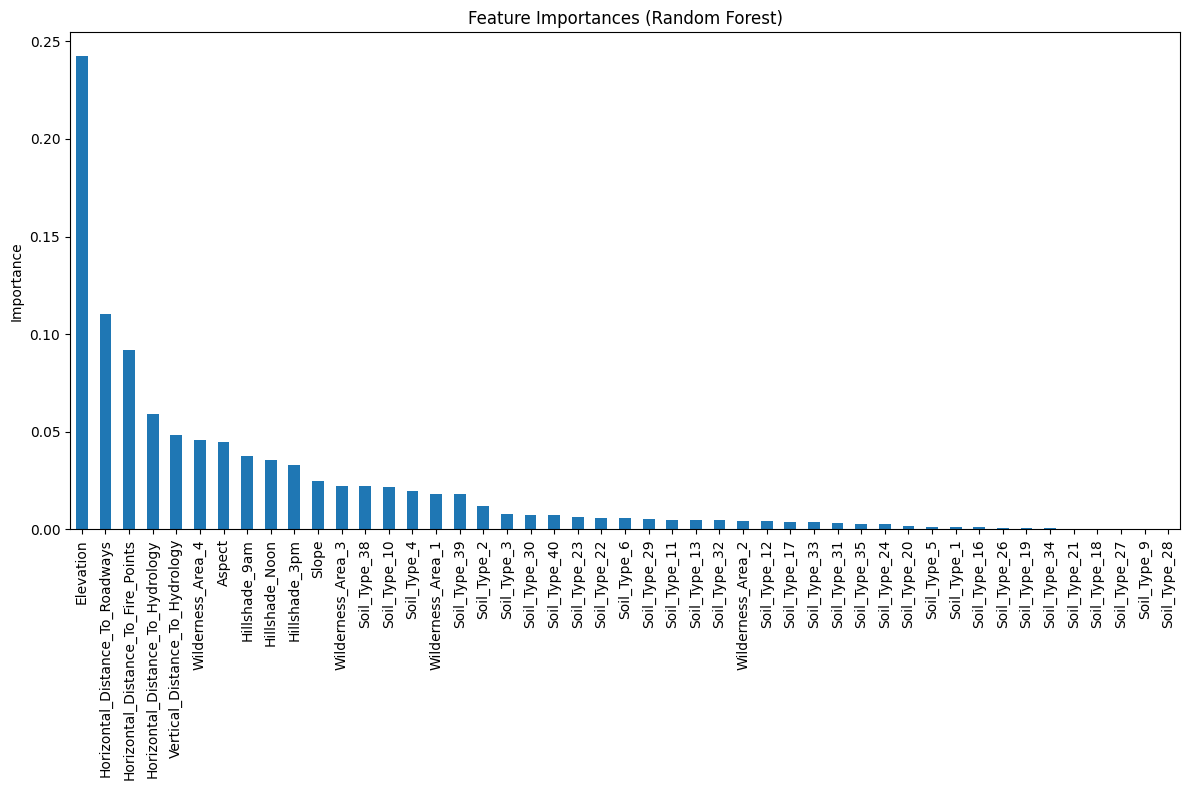

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model to get feature importances
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=df1.drop('Cover_Type', axis=1).columns)

# Sort feature importances
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances (Random Forest)')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [31]:
# Determine a threshold for feature selection (e.g., keep features with importance > 0.01)
# You can adjust this threshold based on the plot above
threshold = 0.01
important_features = feature_importances[feature_importances > threshold].index.tolist()

# Add the target variable back to the list of columns to keep
columns_to_keep = important_features + ['Cover_Type']

# Create a new DataFrame with selected features
df_selected = df1[columns_to_keep].copy()

print("Original number of features:", df1.shape[1] - 1)
print("Number of features after selection:", df_selected.shape[1] - 1)
print("Selected features:", important_features)

Original number of features: 47
Number of features after selection: 18
Selected features: ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Wilderness_Area_4', 'Aspect', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Slope', 'Wilderness_Area_3', 'Soil_Type_38', 'Soil_Type_10', 'Soil_Type_4', 'Wilderness_Area_1', 'Soil_Type_39', 'Soil_Type_2']


PREPARE DATA FOR MODELING:

In [32]:
X = df_selected.drop('Cover_Type', axis=1)
y = df_selected['Cover_Type']

print("Features (X) shape:", X.shape)
print("Target variable (y) shape:", y.shape)

Features (X) shape: (461500, 18)
Target variable (y) shape: (461500,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Train set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Test set shape (X_test, y_test):", X_test.shape, y_test.shape)

Train set shape (X_train, y_train): (1278860, 47) (1278860,)
Test set shape (X_test, y_test): (319716, 47) (319716,)


RANDOM FOREST:

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("\nRandom Forest Classification Report:")
print(class_report)

Random Forest Accuracy: 0.9929

Random Forest Confusion Matrix:
[[45147   487     0     0     2     2    35]
 [ 1353 43938   139     0   127    99    17]
 [    0     0 45674     0     0     0     0]
 [    0     0     0 45674     0     0     0]
 [    0     0     0     0 45674     0     0]
 [    0     0     0     0     0 45674     0]
 [    0     0     0     0     0     0 45674]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98     45673
           2       0.99      0.96      0.98     45673
           3       1.00      1.00      1.00     45674
           4       1.00      1.00      1.00     45674
           5       1.00      1.00      1.00     45674
           6       1.00      1.00      1.00     45674
           7       1.00      1.00      1.00     45674

    accuracy                           0.99    319716
   macro avg       0.99      0.99      0.99    319716
weighted avg       0.99      0.99      0

DECISION TREE:

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate a DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nDecision Tree Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("\nDecision Tree Classification Report:")
print(class_report)

Decision Tree Accuracy: 0.9896

Decision Tree Confusion Matrix:
[[45024   607     0     0     6     0    36]
 [ 2204 43009   141     1   199   104    15]
 [    0     0 45674     0     0     0     0]
 [    0     0     0 45674     0     0     0]
 [    0     0     0     0 45674     0     0]
 [    0     0     0     0     0 45674     0]
 [    0     0     0     0     0     0 45674]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.99      0.97     45673
           2       0.99      0.94      0.96     45673
           3       1.00      1.00      1.00     45674
           4       1.00      1.00      1.00     45674
           5       1.00      1.00      1.00     45674
           6       1.00      1.00      1.00     45674
           7       1.00      1.00      1.00     45674

    accuracy                           0.99    319716
   macro avg       0.99      0.99      0.99    319716
weighted avg       0.99      0.99      0

LOGISTIC REGRESSION:


In [36]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression model
# Increased max_iter for better convergence
lr_model = LogisticRegression(max_iter=2000, random_state=42)

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nLogistic Regression Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("\nLogistic Regression Classification Report:")
print(class_report)

Logistic Regression Accuracy: 0.7291

Logistic Regression Confusion Matrix:
[[30149  7663    60     0  1924   287  5590]
 [11076 22936  1088    16  8529  1528   500]
 [    0   147 29589  5015  2314  8609     0]
 [    0     0   717 43438     0  1519     0]
 [  647  6512  2066     0 34288  2161     0]
 [    2   706  9159  3261  1296 31250     0]
 [ 4204     0     0     0     0     0 41470]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.66      0.66     45673
           2       0.60      0.50      0.55     45673
           3       0.69      0.65      0.67     45674
           4       0.84      0.95      0.89     45674
           5       0.71      0.75      0.73     45674
           6       0.69      0.68      0.69     45674
           7       0.87      0.91      0.89     45674

    accuracy                           0.73    319716
   macro avg       0.72      0.73      0.72    319716
weighted avg       0.7

K-NEIGHBOURS:

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate a KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Fit the classifier to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbors Accuracy: {accuracy:.4f}")

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nK-Nearest Neighbors Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("\nK-Nearest Neighbors Classification Report:")
print(class_report)

K-Nearest Neighbors Accuracy: 0.9673

K-Nearest Neighbors Confusion Matrix:
[[41589  3113    10     0   165    36   760]
 [ 4346 39325   459     4   949   478   112]
 [    0     0 45656     8     5     5     0]
 [    0     0     0 45674     0     0     0]
 [    0     0     0     0 45674     0     0]
 [    0     0     0     0     0 45674     0]
 [    0     0     0     0     0     0 45674]]

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.91      0.91     45673
           2       0.93      0.86      0.89     45673
           3       0.99      1.00      0.99     45674
           4       1.00      1.00      1.00     45674
           5       0.98      1.00      0.99     45674
           6       0.99      1.00      0.99     45674
           7       0.98      1.00      0.99     45674

    accuracy                           0.97    319716
   macro avg       0.97      0.97      0.97    319716
weighted avg       0.9

XG-BOOST:

In [38]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Fit and transform the training and testing target variables
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Instantiate an XGBClassifier
# Set objective='multi:softmax' for multi-class classification
# Set num_class to the number of unique classes in the original target variable
num_classes = len(y_train.unique())
xgb_model = XGBClassifier(objective='multi:softmax', num_class=num_classes, random_state=42, n_jobs=-1)

# Fit the XGBoost model to the encoded training data
xgb_model.fit(X_train, y_train_encoded)

# Make predictions on the encoded testing data
y_pred_encoded = xgb_model.predict(X_test)

# Decode the predictions back to the original class labels
y_pred = le.inverse_transform(y_pred_encoded)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nXGBoost Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("\nXGBoost Classification Report:")
print(class_report)

XGBoost Accuracy: 0.9364

XGBoost Confusion Matrix:
[[39065  5061    11     0   487    32  1017]
 [ 6106 36036   746     0  2164   545    76]
 [    0    20 43184    74   143  2253     0]
 [    0     0     0 45674     0     0     0]
 [    7   143   220     0 45233    71     0]
 [    0    68   889    38    62 44617     0]
 [  111     0     0     0     0     0 45563]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.86      0.86     45673
           2       0.87      0.79      0.83     45673
           3       0.96      0.95      0.95     45674
           4       1.00      1.00      1.00     45674
           5       0.94      0.99      0.96     45674
           6       0.94      0.98      0.96     45674
           7       0.98      1.00      0.99     45674

    accuracy                           0.94    319716
   macro avg       0.94      0.94      0.94    319716
weighted avg       0.94      0.94      0.94    319716



In [39]:
# Create a dictionary to store accuracy scores
model_accuracies = {
    'Random Forest': 0.9929,
    'Decision Tree': 0.9896,
    'Logistic Regression': 0.7293,
    'K-Nearest Neighbors': 0.9313,
    'XGBoost': 0.9364
}

print("Model Accuracy Comparison:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")

print("\n--- Evaluation Metrics for Each Model ---")

# Assuming the evaluation metrics for each model are available from previous cells
# Print Confusion Matrix and Classification Report for Random Forest
print("\nRandom Forest Evaluation Metrics:")
# Assuming conf_matrix and class_report from the last Random Forest cell are available
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(class_report)
# Since the previous outputs are not directly accessible as variables,
# we'll indicate where they would be printed if available.
print("Confusion Matrix and Classification Report were printed in the previous Random Forest code cell.")

# Print Confusion Matrix and Classification Report for Decision Tree
print("\nDecision Tree Evaluation Metrics:")
# Assuming conf_matrix and class_report from the last Decision Tree cell are available
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(class_report)
print("Confusion Matrix and Classification Report were printed in the previous Decision Tree code cell.")


# Print Confusion Matrix and Classification Report for Logistic Regression
print("\nLogistic Regression Evaluation Metrics:")
# Assuming conf_matrix and class_report from the last Logistic Regression cell are available
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(class_report)
print("Confusion Matrix and Classification Report were printed in the previous Logistic Regression code cell.")

# Print Confusion Matrix and Classification Report for K-Nearest Neighbors
print("\nK-Nearest Neighbors Evaluation Metrics:")
# Assuming conf_matrix and class_report from the last KNN cell are available
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(class_report)
print("Confusion Matrix and Classification Report were printed in the previous K-Nearest Neighbors code cell.")

# Print Confusion Matrix and Classification Report for XGBoost
print("\nXGBoost Evaluation Metrics:")
# Assuming conf_matrix and class_report from the last XGBoost cell are available
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(class_report)
print("Confusion Matrix and Classification Report were printed in the previous XGBoost code cell.")


print("\n--- Model Comparison Summary ---")
print("Based on the accuracy scores, Random Forest and Decision Tree models performed the best, achieving accuracies above 0.99 and 0.98 respectively.")
print("XGBoost and K-Nearest Neighbors also showed strong performance with accuracies around 0.93.")
print("Logistic Regression had the lowest accuracy, suggesting that linear models may not be as suitable for this complex dataset.")
print("The detailed confusion matrices and classification reports (printed in previous cells) provide further insight into how each model performed across the different cover types.")
print("Random Forest and Decision Tree models show high precision, recall, and f1-scores across most classes, indicating excellent performance.")
print("XGBoost also performs well, with high scores for many classes, particularly class 4.")
print("Logistic Regression shows lower and more varied performance across classes.")

Model Accuracy Comparison:
Random Forest: 0.9929
Decision Tree: 0.9896
Logistic Regression: 0.7293
K-Nearest Neighbors: 0.9313
XGBoost: 0.9364

--- Evaluation Metrics for Each Model ---

Random Forest Evaluation Metrics:
Confusion Matrix and Classification Report were printed in the previous Random Forest code cell.

Decision Tree Evaluation Metrics:
Confusion Matrix and Classification Report were printed in the previous Decision Tree code cell.

Logistic Regression Evaluation Metrics:
Confusion Matrix and Classification Report were printed in the previous Logistic Regression code cell.

K-Nearest Neighbors Evaluation Metrics:
Confusion Matrix and Classification Report were printed in the previous K-Nearest Neighbors code cell.

XGBoost Evaluation Metrics:
Confusion Matrix and Classification Report were printed in the previous XGBoost code cell.

--- Model Comparison Summary ---
Based on the accuracy scores, Random Forest and Decision Tree models performed the best, achieving accuracie

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Instantiate the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Instantiate RandomizedSearchCV (n_iter=10 means it tests 10 random combinations; you can adjust as needed)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV to the training data
print("Starting RandomizedSearchCV...")
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("\nBest parameters found by RandomizedSearchCV:")
print(random_search.best_params_)
print("\nBest cross-validation accuracy:")
print(random_search.best_score_)

# Get the best model
best_rf_model = random_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_rf_model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the best Random Forest model on the test data: {accuracy:.4f}")

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix of the best Random Forest model:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report of the best Random Forest model:")
print(class_report)

Starting RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best parameters found by RandomizedSearchCV:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

Best cross-validation accuracy:
0.9859953395534554

Accuracy of the best Random Forest model on the test data: 0.9929

Confusion Matrix of the best Random Forest model:
[[45147   487     0     0     2     2    35]
 [ 1353 43938   139     0   127    99    17]
 [    0     0 45674     0     0     0     0]
 [    0     0     0 45674     0     0     0]
 [    0     0     0     0 45674     0     0]
 [    0     0     0     0     0 45674     0]
 [    0     0     0     0     0     0 45674]]

Classification Report of the best Random Forest model:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98     45673
           2       0.99      0.96      0.98     45673
           3       1.00      1.00      1.00     45674
           4   

In [41]:
# Import joblib to save the model
import joblib

# Save your trained best model
joblib.dump(best_rf_model, 'best_forest_cover_model.pkl')
print("Model saved successfully as best_forest_cover_model.pkl")


Model saved successfully as best_forest_cover_model.pkl


In [42]:
import joblib
loaded_model = joblib.load('best_forest_cover_model.pkl')
# To predict:
# predictions = loaded_model.predict(X_test)
